Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `salary`: >50K,<=50K

In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.precision', 2)

In [5]:
path = 'datasets/adult_data.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [9]:
df.describe(include=[object])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

**1. How many men and women (sex feature) are represented in this dataset?**

In [11]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (age feature) of women?**

In [12]:
df[df['sex'] == 'Female']['age'].mean()

36.85823043357163

In [13]:
df.loc[df['sex'] == 'Female', 'age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (native-country feature)?**

In [14]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [15]:
german_fraction = df[df['native-country'] == 'Germany'].shape[0] / df.shape[0]
print(f'{german_fraction * 100 :.2f} %')

0.42 %


In [16]:
german_fraction = float((df['native-country'] == 'Germany').sum()) / df.shape[0]
print(f'{german_fraction * 100 :.2f} %')

0.42 %


**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?**

In [17]:
df['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [18]:
poor_age = df.loc[df['salary'] == '<=50K', 'age']
rich_age = df.loc[df['salary'] == '>50K', 'age']

print(f'The age of rich people: {rich_age.mean():.0f} \u00B1 {rich_age.std():.1f} years.')
print(f'The age of poor people: {poor_age.mean():.0f} \u00B1 {poor_age.std():.1f} years.')

The age of rich people: 44 ± 10.5 years.
The age of poor people: 37 ± 14.0 years.


**6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)**

In [19]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [20]:
hs_edu = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
edu_rich = df.loc[df['salary'] == '>50K', 'education'].unique()
print(edu_rich)
for edu in edu_rich:
    if edu not in hs_edu:
        print(False)
        break

['HS-grad' 'Masters' 'Bachelors' 'Some-college' 'Assoc-voc' 'Doctorate'
 'Prof-school' 'Assoc-acdm' '7th-8th' '12th' '10th' '11th' '9th' '5th-6th'
 '1st-4th']
False


**7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.**

In [21]:
cols_to_show = ['age']
max_age = df.loc[(df['race'] == 'Amer-Indian-Eskimo') & (df['sex'] == 'Male'), 'age'].max()
print(f'Max age for Amer-Indian-Eskimo males is {max_age} years old')
df.groupby(by=['race', 'sex'])[cols_to_show].describe()

Max age for Amer-Indian-Eskimo males is 82 years old


age                                         \
                             count   mean    std   min   25%   50%    75%   
race               sex                                                      
Amer-Indian-Eskimo Female    119.0  37.12  13.11  17.0  27.0  36.0  46.00   
                   Male      192.0  37.21  12.05  17.0  28.0  35.0  45.00   
Asian-Pac-Islander Female    346.0  35.09  12.30  17.0  25.0  33.0  43.75   
                   Male      693.0  39.07  12.88  18.0  29.0  37.0  46.00   
Black              Female   1555.0  37.85  12.64  17.0  28.0  37.0  46.00   
                   Male     1569.0  37.68  12.88  17.0  27.0  36.0  46.00   
Other              Female    109.0  31.68  11.63  17.0  23.0  29.0  39.00   
                   Male      162.0  34.65  11.36  17.0  26.0  32.0  42.00   
White              Female   8642.0  36.81  14.33  17.0  25.0  35.0  46.00   
                   Male    19174.0  39.65  13.44  17.0  29.0  38.0  49.00   

                                 
                            max  
race               sex           
Amer-Indian-Eskimo Female  80.0  
                   Male    82.0  
Asian-Pac-Islander Female  75.0  
                   Male    90.0  
Black              Female  90.0  
                   Male    90.0  
Other              Female  74.0  
                   Male    77.0  
White              Female  90.0  
                   Male    90.0

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [22]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [23]:
married = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
marriage_dict = dict()

for status in df['marital-status'].unique():
    marriage_dict[status] = 'Married' if status in married else 'Bachelor'

df['marriage'] = df['marital-status'].map(marriage_dict)
df.loc[(df['salary'] == '>50K') & (df['sex'] == 'Male'), 'marriage'].value_counts()

Married     5965
Bachelor     697
Name: marriage, dtype: int64

**9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [24]:
max_hours = df['hours-per-week'].max()
print(f'Maximum number of hours per week a person works is {max_hours} hours.')

amount_max_hours = df.loc[df['hours-per-week'] == max_hours].shape[0]
print(f'There are {amount_max_hours} people working for {max_hours} hours.')

amount_rich_workaholics = df.loc[(df['hours-per-week'] == max_hours) & (df['salary'] == '>50K')].shape[0]
print(f'Among them there are {amount_rich_workaholics / amount_max_hours * 100 :.2f} % rich people.')

Maximum number of hours per week a person works is 99 hours.
There are 85 people working for 99 hours.
Among them there are 29.41 % rich people.


**10. Count the average time of work (hours-per-week) those who earning a little and a lot (salary) for each country (native-country).**

In [25]:
pd.set_option('display.max_columns', None)
pd.crosstab(df['salary'], df['native-country'], values=df['hours-per-week'], aggfunc=np.mean)

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.16,41.42,37.91,37.38,38.68,37.99,42.34,38.04,36.03,40.48,41.06,39.14,41.81,39.36,36.33,40.0,34.33,39.14,31.3,38.23,41.44,40.95,39.62,38.24,41.00,40.38,40.00,36.09,41.86,35.07,38.07,38.17,41.94,38.47,39.44,40.16,33.77,42.87,37.06,38.80,37.19,41.6
>50K,45.55,40.00,45.64,38.90,50.00,42.44,47.00,48.75,45.00,44.53,50.75,44.98,50.62,36.67,42.75,NaN,60.00,45.00,50.0,46.48,47.50,48.00,45.40,41.10,47.96,40.00,46.58,37.50,NaN,40.00,43.03,39.00,41.50,39.42,46.67,51.44,46.80,58.33,40.00,45.51,39.20,49.5


------------------------

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

**Quick summary of distribution.**

In the middle - a median

Left and right borders are quartiles (25% and 75%).

The width of the box is **IQR** (Inter-Quartile Range)

`IQR = perc_75 - perc_25`

It is an analogue to the standart deviation, but it is not so acceptible to the outliers.

For example mean observations are often affected by outliers (too high or too low values).

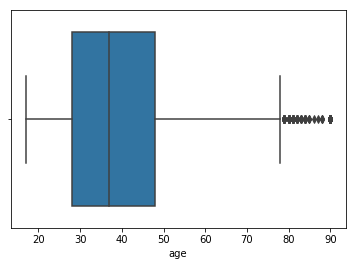

In [27]:
sns.boxplot(x='age', data=df)

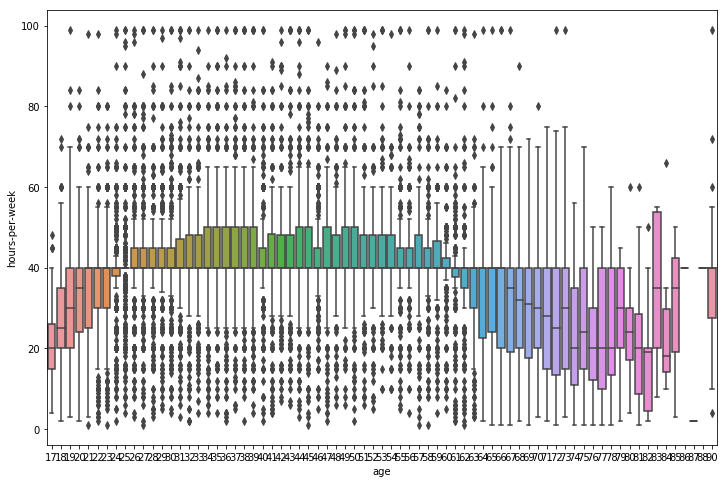

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age', y='hours-per-week', data=df);